In [1]:
import pandas as pd
import numpy as np
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
data = pd.read_excel('./data/data_for_tree.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   uid                    16383 non-null  object        
 1   oil_actv_dt            16383 non-null  datetime64[ns]
 2   create_dt              16383 non-null  datetime64[ns]
 3   total_oil_cnt          16383 non-null  int64         
 4   pay_amount_total       16383 non-null  float64       
 5   class_new              16383 non-null  object        
 6   bad_ind                16383 non-null  int64         
 7   oil_amount             16383 non-null  float64       
 8   discount_amount        16383 non-null  int64         
 9   sale_amount            16383 non-null  int64         
 10  amount                 16383 non-null  int64         
 11  pay_amount             16383 non-null  int64         
 12  coupon_amount          16383 non-null  int64         
 13  p

In [3]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

In [5]:
df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

In [6]:
base = df[org_lst].copy()
base = base.drop_duplicates(['uid'],keep = 'first')

In [6]:
gn = pd.DataFrame()  
for i in agg_lst:  
    #计算个数  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                       lambda df:len(df[i])).reset_index())  
    tp.columns = ['uid',i + '_cnt']  
    if gn.empty == True:
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #求历史特征值大于零的个数  
    tp = pd.DataFrame(df.groupby('uid').apply(
                          lambda df:np.where(df[i]>0,1,0).sum()).reset_index())  
    tp.columns = ['uid',i + '_num']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求和  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                  lambda df:np.nansum(df[i])).reset_index())  
    tp.columns = ['uid',i + '_tot']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求均值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                    lambda df:np.nanmean(df[i])).reset_index())  
    tp.columns = ['uid',i + '_avg']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求最大值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                     lambda df:np.nanmax(df[i])).reset_index())  
    tp.columns = ['uid',i + '_max']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求最小值  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                    lambda df:np.nanmin(df[i])).reset_index())  
    tp.columns = ['uid',i + '_min']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求方差  
    tp = pd.DataFrame(df.groupby('uid').apply(
                                     lambda df:np.nanvar(df[i])).reset_index())  
    tp.columns = ['uid',i + '_var']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求极差  
    tp = pd.DataFrame(df.groupby('uid').apply(
                lambda df:np.nanmax(df[i])-np.nanmin(df[i]) ).reset_index())  
    tp.columns = ['uid',i + '_ran']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')  
    #对历史数据求变异系数,为防止除数为0，利用0.01进行平滑  
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()  
    tp.columns = ['uid',i + '_cva']  
    if gn.empty == True:  
        gn = tp  
    else:  
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')

In [7]:
gc = pd.DataFrame()
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(lambda df:len(set(df[i]))).reset_index())
    tp.colunms = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  


In [8]:
fn = base.merge(gn,on='uid').merge(gc,on='uid')  

In [9]:
fn = pd.merge(fn,gc,on= 'uid')   
fn = fn.fillna(0)
fn.shape

(569, 78)

In [10]:
x = fn.drop(['uid','create_dt','oil_actv_dt','class_new','bad_ind'],axis=1) #删掉列
y = fn.bad_ind.copy()

In [17]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(max_depth = 2,min_samples_leaf = 100,min_samples_split = 100)
dtree = dtree.fit(x,y)

In [12]:
import pydotplus   
from IPython.display import Image  
from sklearn.externals.six import StringIO

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [13]:
dot_data = StringIO()  
tree.export_graphviz(dtree, out_file=dot_data,  
                         feature_names=x.columns,  
                         class_names=['bad_ind'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

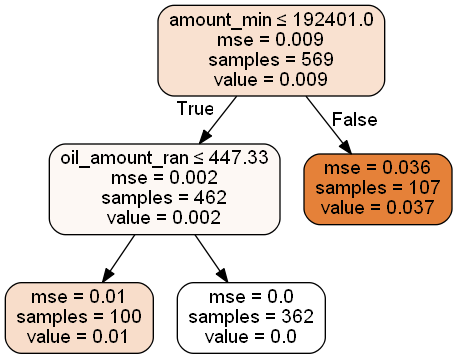

In [18]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
Image(graph.create_png())  
#value = 逾期率

数据集不够，决策树节点分割问题